This file aims to implement basic models for edge detection of the system, it should includes models for Sobel, Canny edge detection, also it should include contour drawing functionalities.

## Test Data Import

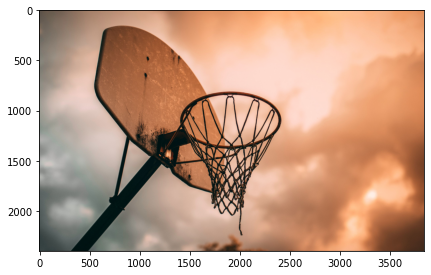

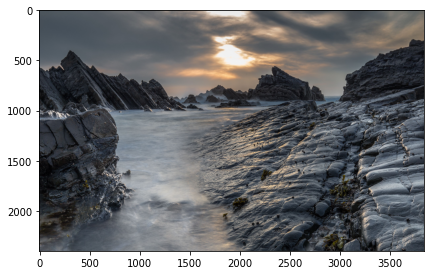

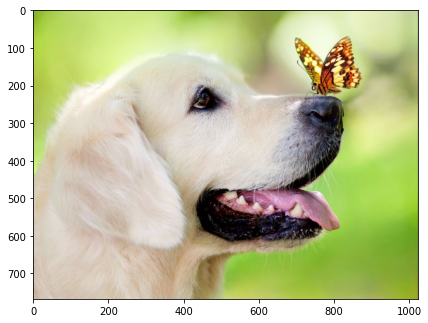

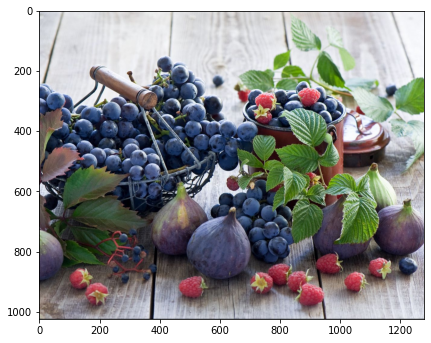

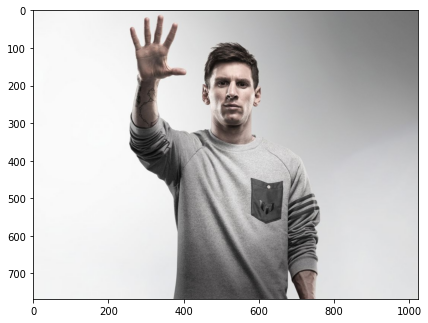

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#test_data_set
test_set = ["test_1_basketball.jpg","test_2_landscape.jpg","test_3_dog.jpg","test_4_fruits.jpg","test_5_people.jpg"]

for i in range(len(test_set)):
    
    plt.figure(figsize=(40,20))
    ax = plt.subplot(1, len(test_set), i+1)
    img = cv2.imread('../Samples/Images/' + test_set[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

## Sobel Edge detection

Note here since cv2.sobel CV_8 will have negative gradient for those from white to black, which will cause the image unpresentable, which halve of those edges(white to black) will be disappear. In order to capture whole edges, we need first **use higher dimension** like CV_16, then use **convertScaleAbs** to convert it back to unit 8 and then **add weights** to get the whole edge detection.

In [39]:
#src is cv2 image generated from cv2.imread
#src is supposed to be a BGR image
#grayscale indicate whether image edges should be presented in black white or rgb 
def my_sobel(src, output_to_screen=True, gray_scale = False):
    img = src.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if gray_scale:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        
    #x, y gradient by unit16
    x = cv2.Sobel(img,cv2.CV_16S,1,0)
    y = cv2.Sobel(img,cv2.CV_16S,0,1)

    #convert back to unit 8
    absX = cv2.convertScaleAbs(x)
    absY = cv2.convertScaleAbs(y)

    #combine
    dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
    if output_to_screen:
        plt.imshow(dst)
    return dst

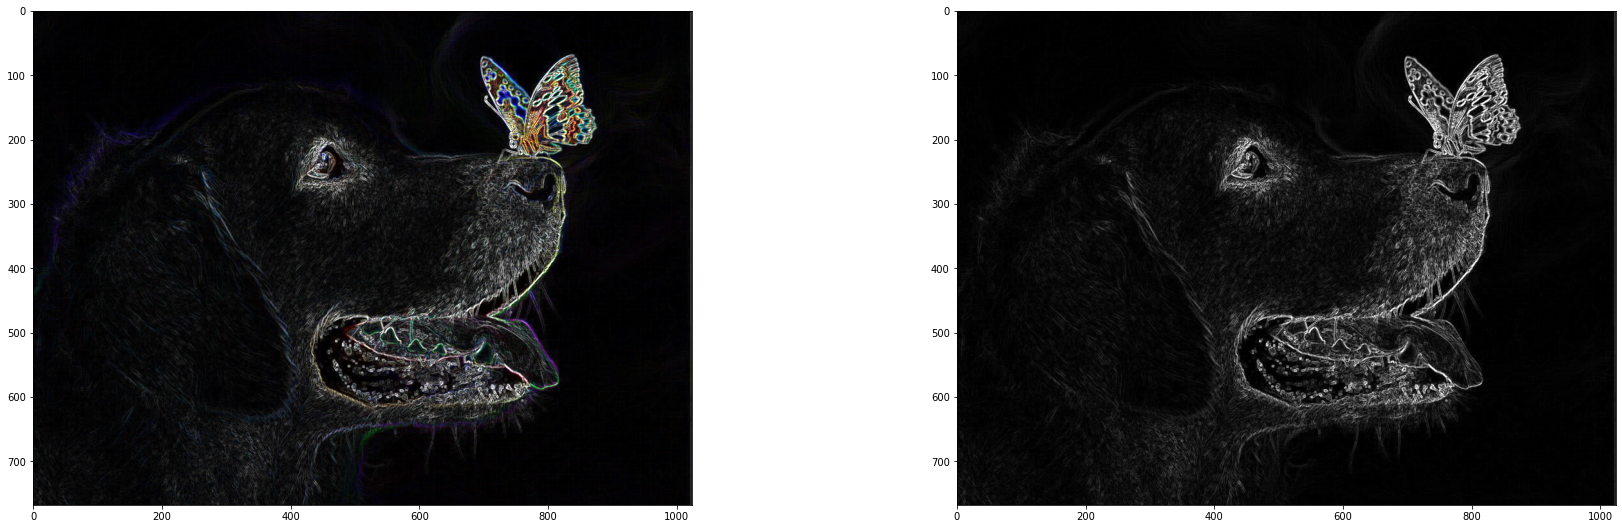

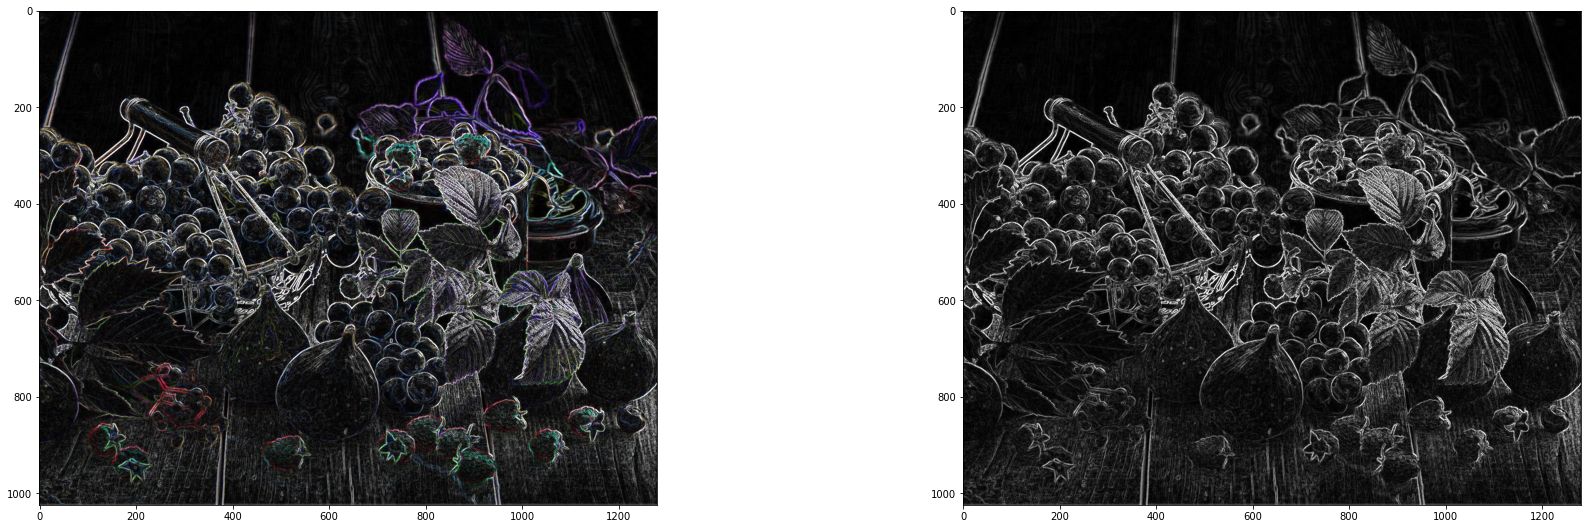

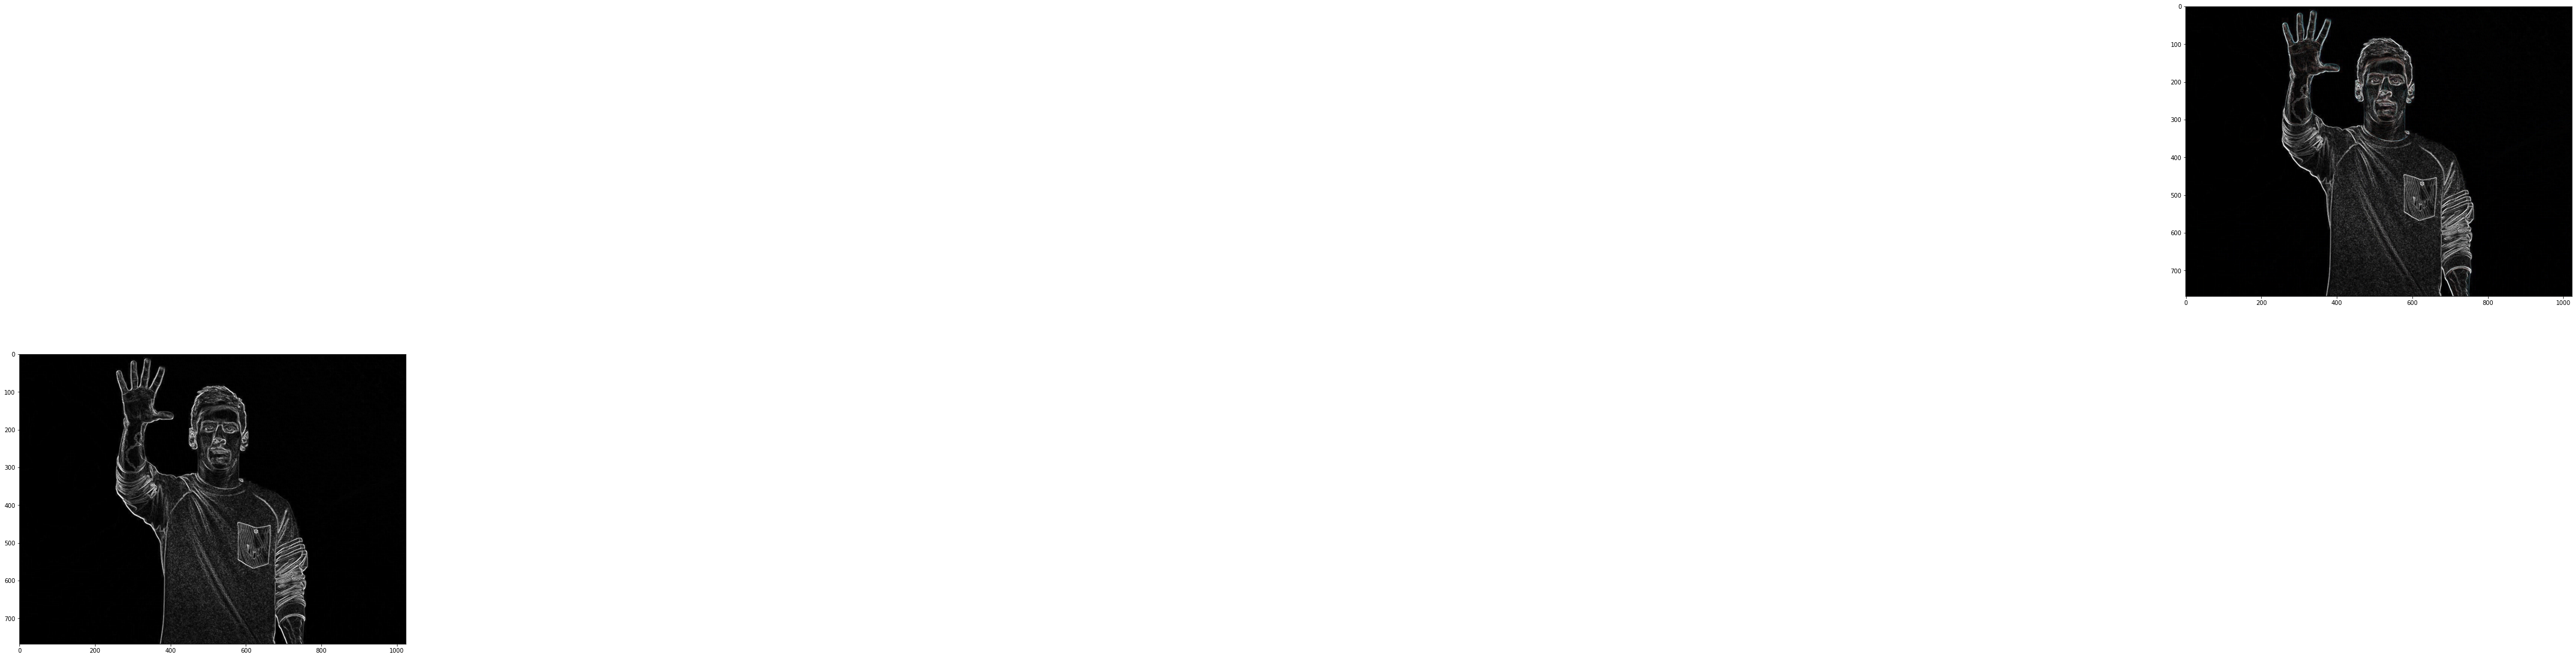

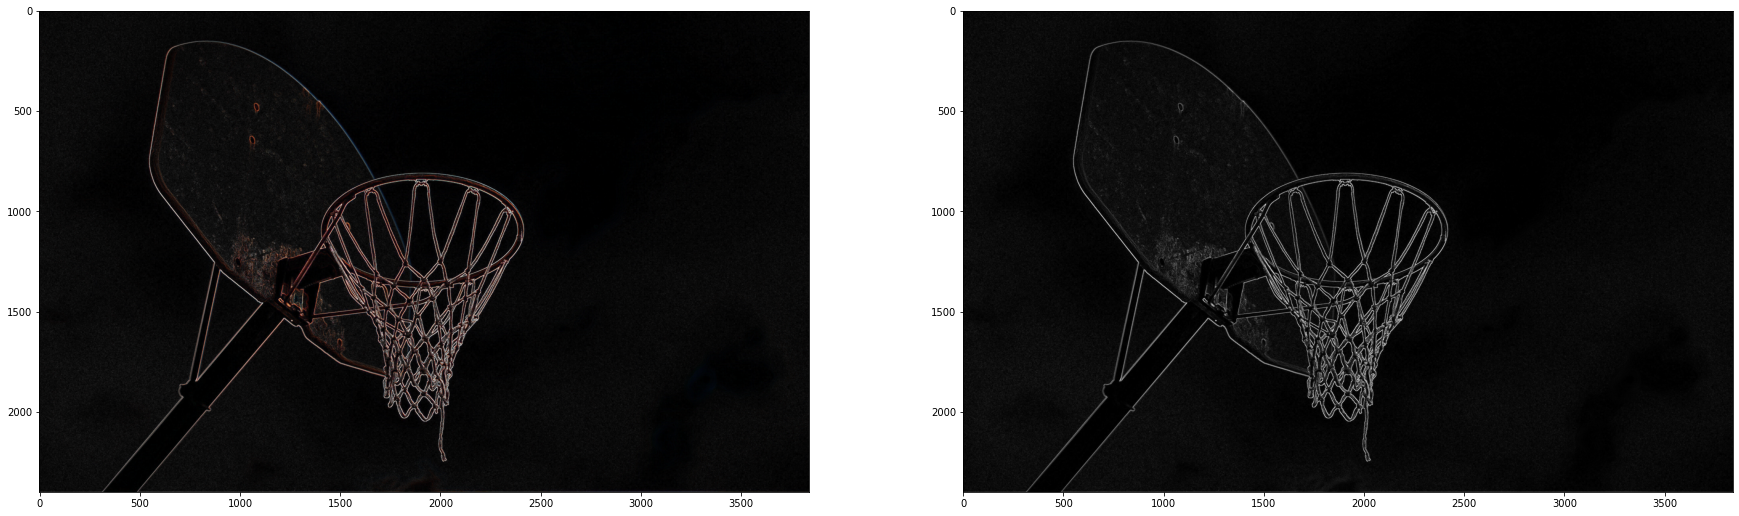

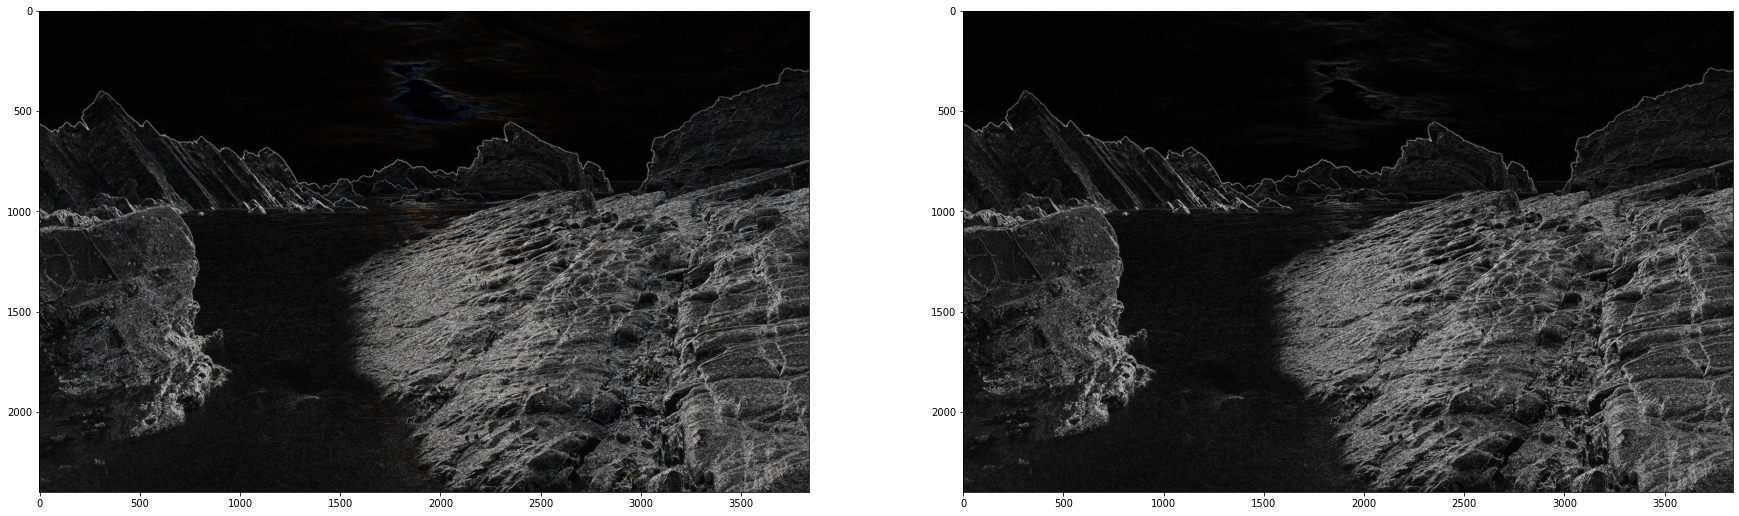

In [40]:
#test the function
for i in range(len(test_set)):
    plt.figure(figsize=(80,20))
    ax1 = plt.subplot(2, len(test_set), 2*i + 1)
    ax2 = plt.subplot(2, len(test_set), 2*i + 2)
    img = cv2.imread('../Samples/Images/' + test_set[i])
    edge_color = my_sobel(img)
    edge_gray =  my_sobel(img, gray_scale = True, output_to_screen= False)

    ax1.imshow(edge_color)
    ax2.imshow(edge_gray, cmap = "gray")

In [ ]:
for i in range(len(test_set)):
    img = cv2.imread('../Samples/Images/' + test_set[i])
    edge_color = my_sobel(img)
    edge_gray =  my_sobel(img, gray_scale = True)
    plt.subplots(figsize=(80,20))
    

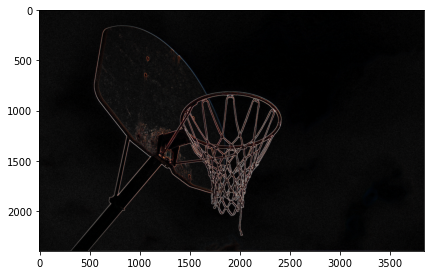

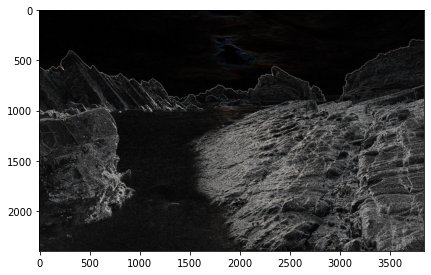

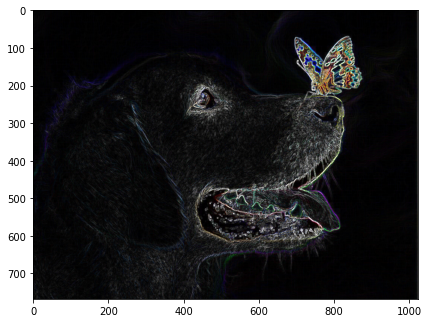

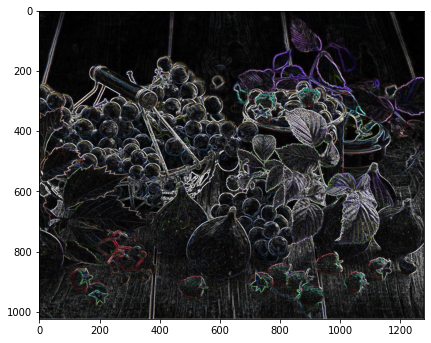

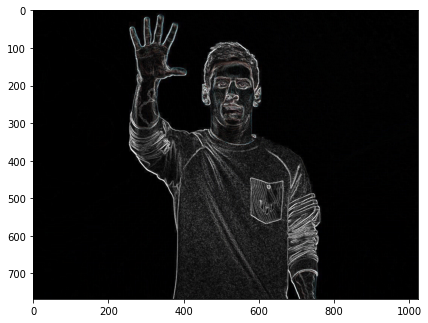

In [32]:
for i in range(len(test_set)):
    
    plt.figure(figsize=(40,20))
    ax = plt.subplot(1, len(test_set), i+1)
    img = cv2.imread('../Samples/Images/' + test_set[i])
    """
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    x = cv2.Sobel(img,cv2.CV_16S,1,0)
    y = cv2.Sobel(img,cv2.CV_16S,0,1)
    absX = cv2.convertScaleAbs(x)   # 转回uint8
    absY = cv2.convertScaleAbs(y)
    dst = cv2.addWeighted(absX,0.5,absY,0.5,0)
    """
    dst = my_sobel(img)
    ax.imshow(dst)

